In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [5]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [6]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [7]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [8]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

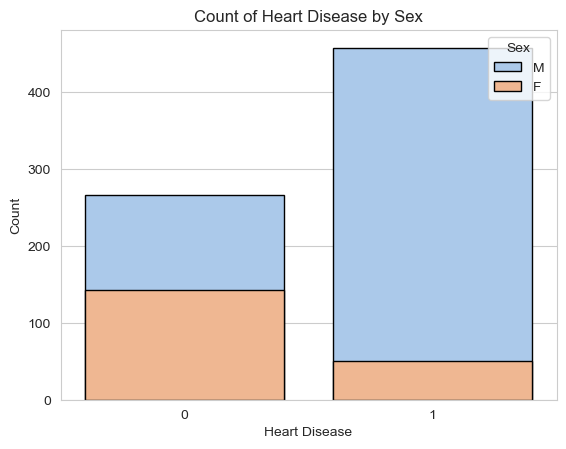

In [9]:
# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the count plot with stacked bars
sns.countplot(x='HeartDisease', hue='Sex', data=df, dodge=False, edgecolor='black')
plt.legend(title='Sex', loc='upper right')

# Add title and labels
plt.title('Count of Heart Disease by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

# Show the plot
plt.show()

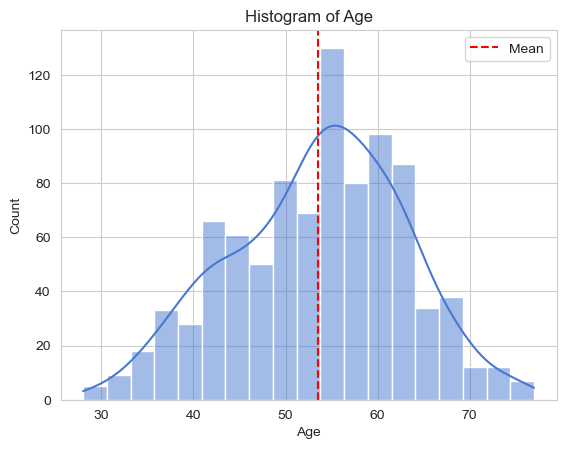

In [10]:
# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('muted')

# Create the histogram plot with a vertical line for the mean
sns.histplot(x='Age', data=df, kde=True)
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


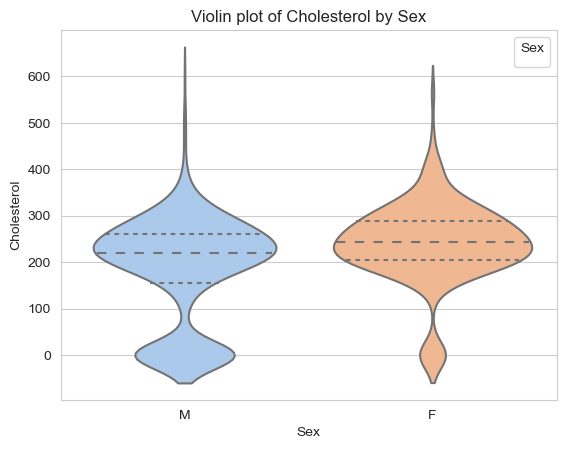

In [11]:
# Set the style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the violin plot with split violins
sns.violinplot(x='Sex', y='Cholesterol', data=df, split=True, inner='quartile')
plt.legend(title='Sex', loc='upper right')

# Add title and labels
plt.title('Violin plot of Cholesterol by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')

# Show the plot
plt.show()

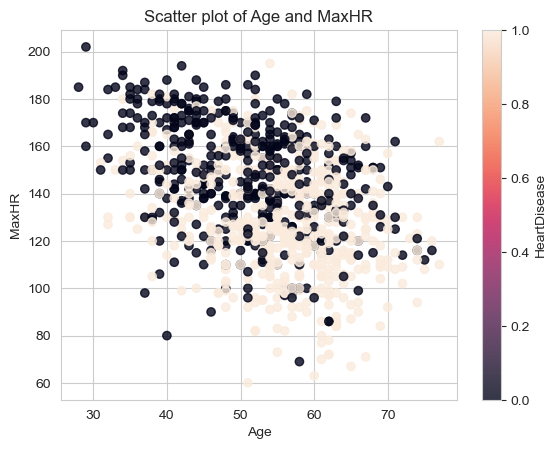

In [12]:
# Create the scatter plot with markers and colors based on HeartDisease
plt.scatter(x=df['Age'], y=df['MaxHR'], c=df['HeartDisease'], marker='o', alpha=0.8)
plt.colorbar(label='HeartDisease')

# Add title and labels
plt.title('Scatter plot of Age and MaxHR')
plt.xlabel('Age')
plt.ylabel('MaxHR')

# Show the plot
plt.show()

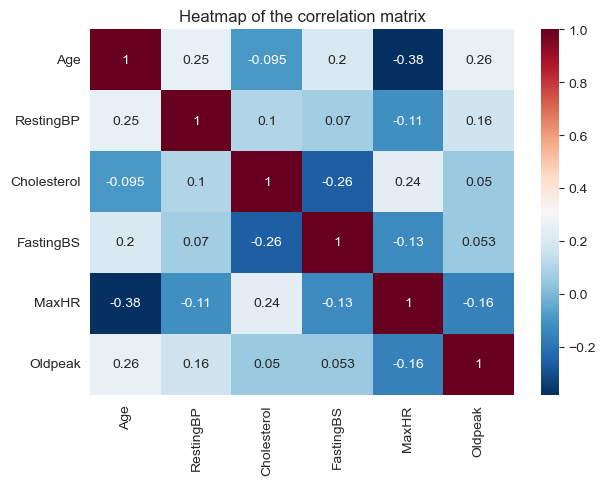

In [13]:
# Set the style and color palette
sns.set_style('white')
sns.set_palette('coolwarm')

# Compute the correlation matrix of the numerical columns
corr = df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']].corr()

# Create the heatmap with annotations and a diverging color map
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.tight_layout()

# Add title
plt.title('Heatmap of the correlation matrix')

# Show the plot
plt.show()

In [14]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### modeling

In [15]:
df.replace({'M':1,'F':0},inplace=True)

In [16]:
df.rename(columns={'Sex':'male'},inplace=True)

### encoding


In [17]:
dummies = pd.get_dummies(df.ChestPainType)
dummies

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [18]:
dummies1 = pd.get_dummies(df.RestingECG)
dummies1

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,1,0,0


In [19]:
dummies2 = pd.get_dummies(df.ExerciseAngina)
dummies2

,N,Y
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
913,1,0
914,1,0
915,0,1
916,1,0


In [20]:
dummies3 = pd.get_dummies(df.ST_Slope)
dummies3

,Down,Flat,Up
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,0,1,0


In [21]:
merged = pd.concat([df,dummies,dummies1,dummies2,dummies3],axis='columns') # concatination of the two dataframes 
merged

,Age,male,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,1,ATA,140,289,0,Normal,172,N,0.0,...,0,0,0,1,0,1,0,0,0,1
1,49,0,NAP,160,180,0,Normal,156,N,1.0,...,1,0,0,1,0,1,0,0,1,0
2,37,1,ATA,130,283,0,ST,98,N,0.0,...,0,0,0,0,1,1,0,0,0,1
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,...,0,0,0,1,0,0,1,0,1,0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,...,0,1,0,1,0,1,0,0,1,0
914,68,1,ASY,144,193,1,Normal,141,N,3.4,...,0,0,0,1,0,1,0,0,1,0
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,...,0,0,0,1,0,0,1,0,1,0
916,57,0,ATA,130,236,0,LVH,174,N,0.0,...,0,0,1,0,0,1,0,0,1,0


In [22]:
merged.drop(['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],inplace=True,axis=1)

In [23]:
merged.head()

,Age,male,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,1,140,289,0,172,0.0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1


### spliting data

In [24]:
from sklearn.model_selection import train_test_split
x=merged.drop(['HeartDisease'],axis=1)
y=merged.HeartDisease

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=35)


In [26]:
def train (model,model_name):
    model.fit(x_train, y_train)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")


### LogisticRegression

In [27]:
log=LogisticRegression()
train(log,'Logistic regression')

Logistic regression model score on Training data: 87.5%
Logistic regression model score on Testing data: 84.34782608695653%


D:\jupyter\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### svm

In [28]:
# SVM
svm_model = SVC()
train(svm_model,'SVM')

SVM model score on Training data: 72.38372093023256%
SVM model score on Testing data: 71.73913043478261%


### KNeighborsClassifier

In [29]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
train(knn_model,'K-Nearest Neighbors')

K-Nearest Neighbors model score on Training data: 79.21511627906976%
K-Nearest Neighbors model score on Testing data: 68.26086956521739%


### neural network

In [30]:
neural=MLPClassifier()
train(neural,'neural network')

neural network model score on Training data: 88.37209302325581%
neural network model score on Testing data: 85.21739130434783%


### GradientBoostingClassifier

In [31]:
gradient=GradientBoostingClassifier()
train(gradient,'GradientBoostingClassifier')

GradientBoostingClassifier model score on Training data: 95.63953488372093%
GradientBoostingClassifier model score on Testing data: 87.82608695652175%


### Linear Discriminant Analysis

In [32]:
lda=LinearDiscriminantAnalysis()
train(lda,'LinearDiscriminantAnalysis')

LinearDiscriminantAnalysis model score on Training data: 87.06395348837209%
LinearDiscriminantAnalysis model score on Testing data: 83.47826086956522%
